# Pandas

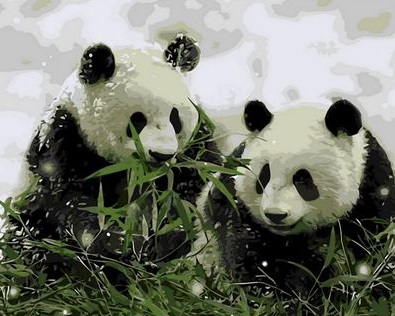

<a href="http://pandas.pydata.org/">Pandas</a> - это библиотека для обработки и анализа данных (в основном табличных). Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

In [1]:
import numpy as np
import pandas as pd

В pandas есть две основные структуры данных:

- **Series**: одномерный массив с именованными индексами (чаще всего, данные одного типа)  
- **DataFrame**: двухмерный массив, имеет табличную структуру, легко изменяется по размерам, может содержать в себе данные разных типов


Давайте создадим объекты кажого из типов:

`pandas.Series(data=None, index=None, dtype=None)`

`pandas.DataFrame(data=None, index=None, columns=None, dtype=None)`

data - данные, которые передаются в структуру

index - индексы строк

columns - названия столбцов (на самом деле это тоже индекс, только наоборот)

dtype - тип данных (похоже на типы в numpy)

Единственным обязательным параметром является *data*, другие - опциональны

# Series
Одномерные объекты

In [11]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [14]:
dates = pd.date_range("20130101", periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [15]:
s.index = dates
print(s)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64


# DataFrame 
Двумерные таблицы

In [7]:
# создадим датафрейм руками
columns = ['sex', 'temperature', 'age', 'birth_date']
index = [4015, 4332, 1223, 5432]
data = [['F', 'F', 'M', 'F'], 
        [35, 36.6, None, -1], 
        [10, 14, 42, 14], 
        ['2010-09-01', '2006-04-10', '1979-09-11', '2006-15-06']]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.head()

,sex,temperature,age,birth_date
4015,F,F,M,F
4332,35,36.6,None,-1
1223,10,14,42,14
5432,2010-09-01,2006-04-10,1979-09-11,2006-15-06


In [8]:
# можем не передавать колонки/индекс
df = pd.DataFrame(data)
df.head()

,0,1,2,3
0,F,F,M,F
1,35,36.6,None,-1
2,10,14,42,14
3,2010-09-01,2006-04-10,1979-09-11,2006-15-06


Но так редко кто делает, давайте считаем csv файл.
**Сразу оговоримся, что стиль названия столбцов у данного датасета так себе, не желательно придерживаться такой же нотации как и для переменных в python а именно: lowercase, with words separated by underscores или нижний регистр, разделяя слова 1 нижним подчеркиванием**

In [10]:
df = pd.read_csv("./sample_data.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Некоторые важные параметры
- filepath_or_buffer - строка с адресом файла
- sep (delimeter) - разделитель столбцов в csv файле
- header - номер строки с названиями столбцов или None, если нет
- names - если мы хотим указать названия колонок
- index_col - номер столбца/список для индекса

# Просмотр данных

In [16]:
# как вы уже видели - есть метод head
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [17]:
# можно указать размер выдачи вместо 5 по умолчанию
df.head(7)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0


In [19]:
# tail - обратная функция
df.tail(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [20]:
# отдельно получаем индекс
print(df.index)
# и столбцы
print(df.columns)

RangeIndex(start=0, stop=10000, step=1)
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [21]:
# из данных можно получить numpy массив!
df.to_numpy()

array([[1, 'M14860', 'M', ..., 0, 0, 0],
       [2, 'L47181', 'L', ..., 0, 0, 0],
       [3, 'L47182', 'L', ..., 0, 0, 0],
       ...,
       [9998, 'M24857', 'M', ..., 0, 0, 0],
       [9999, 'H39412', 'H', ..., 0, 0, 0],
       [10000, 'M24859', 'M', ..., 0, 0, 0]], dtype=object)

In [22]:
# другой способ
df.values

array([[1, 'M14860', 'M', ..., 0, 0, 0],
       [2, 'L47181', 'L', ..., 0, 0, 0],
       [3, 'L47182', 'L', ..., 0, 0, 0],
       ...,
       [9998, 'M24857', 'M', ..., 0, 0, 0],
       [9999, 'H39412', 'H', ..., 0, 0, 0],
       [10000, 'M24859', 'M', ..., 0, 0, 0]], dtype=object)

Для исследования данных полезно получить основные статистики столбцов. В pandas это можно сделать одним кликом  
.describe предоставляет следующие данные:
- кол-во записей
- среднее
- стандартное отклонение
- минимум
- квантили (по умолчанию 25/50(медиана)/75) но можно передать любой список своих
- максимум

In [23]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [25]:
# Данные, индекс можно сортировать
df.sort_index().head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [27]:
# Данные, индекс можно сортировать
df.sort_values('Rotational speed [rpm]', ascending=True).head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
994,995,M15854,M,296.2,307.2,1168,63.4,172,0,0,0,0,0,0
8437,8438,L55617,L,298.7,309.8,1181,65.9,203,1,0,0,0,1,0
6404,6405,M21264,M,300.2,309.7,1183,61.4,170,0,0,0,0,0,0
3584,3585,L50764,L,301.8,310.6,1192,68.9,135,0,0,0,0,0,0
7763,7764,L54943,L,300.4,311.6,1200,76.6,3,1,0,0,1,0,0


Давайте уже избавимся от этих ужасных названия столбцов :)  
Воспользуемся стандартной библиотекой `re` для регулярных выражений

In [39]:
import re
df = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x.replace(" ", "_").lower()))

In [40]:
# ну вот, другое дело
df.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,twf,hdf,pwf,osf,rnf
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Выбор данных, срезы

In [44]:
df_small = df.head(3)

In [45]:
# 1 столбец

# по названию
print(df_small['type'])

# есть и такой способ, но он не приветствуется
print(df_small.type)

0    M
1    L
2    L
Name: type, dtype: object
0    M
1    L
2    L
Name: type, dtype: object


In [47]:
# несколько столбцов по названию - передаем список

df_small[['type', 'process_temperature_k']].head()

,type,process_temperature_k
0,M,308.6
1,L,308.7
2,L,308.5


### .loc и .iloc

- .iloc - работает с номерами индексов
- .loc - работает с названиями индекса / столбцов

In [56]:
# конкретный объект
df.iloc[4]

udi                           5
product_id               L47184
type                          L
air_temperature_k         298.2
process_temperature_k     308.7
rotational_speed_rpm       1408
torque_nm                  40.0
tool_wear_min                 9
machine_failure               0
twf                           0
hdf                           0
pwf                           0
osf                           0
rnf                           0
Name: 4, dtype: object

In [57]:
# срез - как в Numpy
df.iloc[4:5, [1, 4, 2]]

,product_id,process_temperature_k,type
4,L47184,308.7,L


In [60]:
df.loc[:, "type"]

0       M
1       L
2       L
3       L
4       L
       ..
9995    M
9996    H
9997    M
9998    H
9999    M
Name: type, Length: 10000, dtype: object

In [61]:
df.loc[3, "type"]

'L'

In [62]:
df.loc[[1, 3], ["torque_nm", "twf"]]

,torque_nm,twf
1,46.3,0
3,39.5,0


In [65]:
# булевская индексация - создадим условие
print(df['torque_nm'] > 40)


print(df['type'] == "M")

0        True
1        True
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999     True
Name: torque_nm, Length: 10000, dtype: bool
0        True
1       False
2       False
3       False
4       False
        ...  
9995     True
9996    False
9997     True
9998    False
9999     True
Name: type, Length: 10000, dtype: bool


In [66]:
# и выделим
df[df['type'] == "M"]

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,twf,hdf,pwf,osf,rnf
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0
12,13,M14872,M,298.6,309.1,1339,51.1,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,M24849,M,298.8,308.5,1577,33.2,0,0,0,0,0,0,0
9991,9992,M24851,M,298.9,308.4,1827,26.1,5,0,0,0,0,0,0
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [67]:
# несколько условий сразу
df[(df['type'] == "M") & (df['torque_nm'] > 40)]

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,twf,hdf,pwf,osf,rnf
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
12,13,M14872,M,298.6,309.1,1339,51.1,34,0,0,0,0,0,0
16,17,M14876,M,298.6,309.2,1311,46.6,44,0,0,0,0,0,0
17,18,M14877,M,298.7,309.2,1410,45.6,47,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,9950,M24809,M,298.2,307.8,1411,53.4,110,0,0,0,0,0,0
9954,9955,M24814,M,298.1,307.9,1446,42.8,121,0,0,0,0,0,0
9982,9983,M24842,M,298.7,308.4,1507,45.7,192,0,0,0,0,0,0
9986,9987,M24846,M,298.8,308.6,1507,42.3,207,0,0,0,0,0,0


In [69]:
# присваивание лучше делать через loc / iloc
df.loc[df['type'] == "M", "tool_wear_min"] = -1
df.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,twf,hdf,pwf,osf,rnf
0,1,M14860,M,298.1,308.6,1551,42.8,-1,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Операции

Pandas поддерживает много статистических операций:
- mean (): вычислить среднее значение 
- median (): медиана
- sum (): вычислить сумму значений 
- size (): вычислить размеры 
- std (): стандартное отклонение 
- var (): дисперсия
- sem (): стандартная ошибка среднего по группам
- first (): вычислить первое из значений
- last (): вычислить последнее из значений 
- nth (): n-е значение или подмножество, если n - список
- min (): минимум
- max (): максимум

In [71]:
df['torque_nm'].mean()

39.986909999999995

# Группирование
Операции группирования (в pandas .groupby) - одна из самых мощных возможностей данной библиотеки и одна из самых частых и полезных функций при анализе данных в принципе

In [73]:
# Данные операции определяют логику формирования групп (на основе уникальных значений столбца/столбцов)

# по стоблцу
df.groupby("air_temperature_k")
# по стоблцам
df.groupby(["air_temperature_k", "twf"])
# можно так
df.groupby(df['type'])

In [77]:
# далее нужно применить какую-либо операцию 
print(df.groupby(df['type'])['rotational_speed_rpm'].mean())

print(df.groupby(df['type'])[['air_temperature_k', 'rotational_speed_rpm']].median())


type
H    1538.147557
L    1539.469167
M    1537.598932
Name: rotational_speed_rpm, dtype: float64
      air_temperature_k  rotational_speed_rpm
type                                         
H                 299.8                  1500
L                 300.1                  1504
M                 300.1                  1503


In [78]:
# несколько функций - обратите внимание - появляется мультииндекс
df.groupby(df['type'])[['air_temperature_k', 'rotational_speed_rpm']].agg(['mean', 'max'])

air_temperature_k        rotational_speed_rpm      
                  mean    max                 mean   max
type                                                    
H           299.866999  304.2          1538.147557  2636
L           300.015833  304.5          1539.469167  2886
M           300.029263  304.4          1537.598932  2710

In [93]:
# более специфичные условия
df.groupby('type').agg(
    max_temp=('air_temperature_k', 'max'), 
    min_speed=('rotational_speed_rpm', 'min'), 
    root_speed=('rotational_speed_rpm', 'max'))

,max_temp,min_speed,root_speed
type,,,
H,304.2,1212,2636
L,304.5,1181,2886
M,304.4,1168,2710


# Соединение таблиц
Часто возникает потребность объединить таблицы по тому или иному условию (по аналогии с join в sql). Если вы еще не знаете типы джоинов - то обязательно изучите:
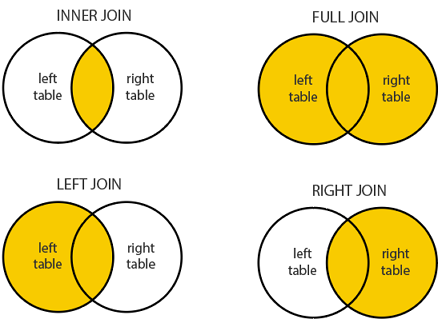

В пандас это можно делать через:
- pd.merge
- pd.join
- df.merge
- df.join

In [95]:
df_mean_temp = df.groupby('type').agg(mean_temp=('air_temperature_k', 'mean')).reset_index()
df_mean_temp.head()

,type,mean_temp
0,H,299.866999
1,L,300.015833
2,M,300.029263


In [102]:
# можно выбирать столбец/столбцы, способ джоина (left, right, inner, outer) и некоторые другие параметры
pd.merge(df, df_mean_temp, on='type', how='left')

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,twf,hdf,pwf,osf,rnf,mean_temp
0,1,M14860,M,298.1,308.6,1551,42.8,-1,0,0,0,0,0,0,300.029263
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,300.015833
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,300.015833
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,300.015833
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,300.015833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,-1,0,0,0,0,0,0,300.029263
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,299.866999
9997,9998,M24857,M,299.0,308.6,1645,33.4,-1,0,0,0,0,0,0,300.029263
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,299.866999
